In [3]:
import zipfile
archive = zipfile.ZipFile('/home/aleko/Downloads/dataset.zip', 'r')

In [4]:
archive.extractall()
archive.close()

In [3]:
import pandas

dataset = pandas.read_csv("../mediaeval-2015-trainingset.txt", sep='\t')

In [241]:
dataset.head()


tweetId                                          tweetText  \
0  263046056240115712  ¿Se acuerdan de la película: “El día después d...   
1  262995061304852481  @milenagimon: Miren a Sandy en NY!  Tremenda i...   
2  262979898002534400  Buena la foto del Huracán Sandy, me recuerda a...   
3  262996108400271360     Scary shit #hurricane #NY http://t.co/e4JLBUfH   
4  263018881839411200  My fave place in the world #nyc #hurricane #sa...   

      userId      imageId(s)        username                       timestamp  \
0   21226711  sandyA_fake_46         iAnnieM  Mon Oct 29 22:34:01 +0000 2012   
1  192378571  sandyA_fake_09  CarlosVerareal  Mon Oct 29 19:11:23 +0000 2012   
2  132303095  sandyA_fake_09     LucasPalape  Mon Oct 29 18:11:08 +0000 2012   
3  241995902  sandyA_fake_29     Haaaaarryyy  Mon Oct 29 19:15:33 +0000 2012   
4  250315890  sandyA_fake_15  princess__natt  Mon Oct 29 20:46:02 +0000 2012   

  label  
0  fake  
1  fake  
2  fake  
3  fake  
4  fake

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
tweetId       14277 non-null int64
tweetText     14277 non-null object
userId        14277 non-null int64
imageId(s)    14277 non-null object
username      14277 non-null object
timestamp     14277 non-null object
label         14277 non-null object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [88]:
import altair as alt

alt.data_transformers.disable_max_rows()

bars = alt.Chart(dataset).mark_bar(size=50).encode(
    x=alt.X("label"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of tweets')),
    tooltip=[alt.Tooltip('count()', title='Number of tweets'), 'label'],
    color='label'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of tweets in each category",
)

alt.LayerChart(...)

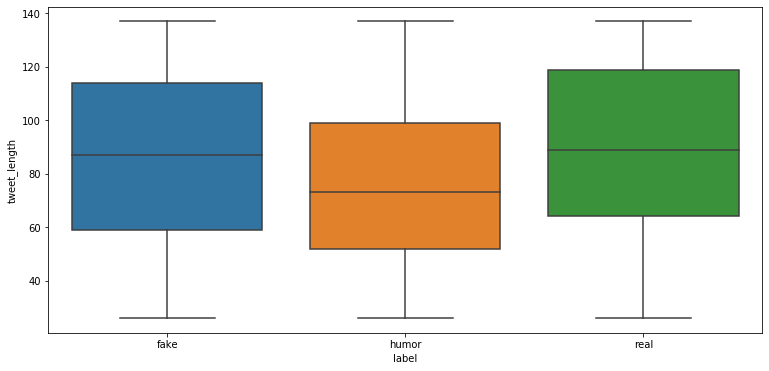

In [26]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='label', y='tweet_length');

In [2]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer as twd

list_of_stopwords = stopwords.words('english') + stopwords.words('spanish') + stopwords.words('arabic') + stopwords.words('russian') + stopwords.words('swedish') + stopwords.words('dutch')

#remove stopwords
def remove_stopwords(tweet):
    new_text = ""
    for word in tweet.split():
        if word not in list_of_stopwords:
            new_text += word + " "
    #words = [w for w in tweet if w not in list_of_stopwords]
    return new_text


#change labels 
dic = {'real': 0, 'fake': 1, 'humor': 1}
dataset = dataset.replace({"label": dic})

dataset['tweetText'] = dataset['tweetText'].str.replace('(RT|Rt|MT):?\s?.?(@?\w+:?).*', '')                                    #remove retweets                               
dataset['tweetText'] = dataset['tweetText'].str.replace('[“”"]?@\w+:[\w\W]*[“”"]?', '')       #test if this works #remove quoted retweets
dataset['tweetText'] = dataset['tweetText'].str.replace('(via)?\s?(@\w+:?)', '')                                    #remove mentions
dataset['tweetText'] = dataset['tweetText'].str.replace('(https?://\s?t.co/\w+)|(http:\s\W+t.co\W+\w+)', '')      #remove http links
dataset['tweetText'] = dataset['tweetText'].str.replace('\\\\n', ' ')                       #remove special characters 
dataset['tweetText'] = dataset['tweetText'].str.replace('\b[oO0]_[Oo0]\b', ' ')
dataset['tweetText'] = dataset['tweetText'].str.replace('\b:[o0O]\b', ' ')
dataset['tweetText'] = dataset['tweetText'].str.replace('\b:[pP]\b', ' ')
dataset['tweetText'] = dataset['tweetText'].str.replace('_', ' ')
dataset['tweetText'] = dataset['tweetText'].str.replace('#', ' ')
dataset['tweetText'] = dataset['tweetText'].str.replace('/', ' ')
dataset['tweetText'] = dataset['tweetText'].str.replace('(&gt;)*(&lt;)*', '')                 #remove gt lt 
dataset['tweetText'] = dataset['tweetText'].str.lower()                                    #convert text to lowercase

#removing corrupted rows
indexnames1 = dataset[dataset['tweetText'].str.contains(pat = "\+0000")].index
dataset.drop(indexnames1, inplace=True)

dataset['tweetText'] = dataset['tweetText'].str.replace('[^\w\s]', ' ')                   #remove special characters 

   
dataset['tweetText'] = dataset['tweetText'].apply(lambda x : remove_stopwords(x))         #remove stopwords

#remove duplicates
dataset.drop_duplicates(subset = 'tweetText', keep = 'first', inplace = True)

#drop fields where tweet is empty
indexnames2 = dataset[dataset.tweetText == ''].index
indexnames3 = dataset[dataset.tweetText == ' '].index
dataset.drop(indexnames2, inplace=True)
dataset.drop(indexnames3, inplace=True)
#dataset['tweetText'] = dataset['tweetText'].apply(lambda x : word_tokenize(x))            #tokenize words in tweets

        
#remove empty lists left after removing stopwords
#indexnames4 = dataset[dataset['tweetText'].apply(lambda x : x == [])].index
#dataset.drop(indexnames4, inplace=True)

#detokenize words to drop duplicates again
#dataset['tweetText'] = dataset['tweetText'].apply(lambda x : "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in x]).strip()) 

dataset = dataset.reset_index(drop=True)




In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 7 columns):
tweetId       9739 non-null int64
tweetText     9739 non-null object
userId        9739 non-null int64
imageId(s)    9739 non-null object
username      9739 non-null object
timestamp     9739 non-null object
label         9739 non-null int64
dtypes: int64(3), object(4)
memory usage: 532.7+ KB


In [4]:
tweetText = dataset['tweetText']
sum9 = 0
for i in range(len(tweetText)):
    print(tweetText[i])

               


acuerdan película día después mañana recuerda pasando huracán sandy 
buena foto huracán sandy recuerda película día independencia id4 sandy 
scary shit hurricane ny 
fave place world nyc hurricane sandy statueofliberty 
42nd time square nyc subway hurricane 
time halloween photo hurricane sandy frankenstorm 
crazy pic hurricane sandy prayers go family friends east coast 
sandy newyork hurricane statueofliberty usa 
nyc hurricane 
robertosalibaba god brother sandy hurricane newyork 
crazy hurricane sandy 
shark newjersey swim sandy hurricane 
good luck ny newyork usa hurricane sandy 
wow fishing anyone hurricane sandy 
well howdy hurricane sandy wanted let know took power internet amp amp happi 
known bcs jason chen updated pic everyone safe newyork sandy hurricane nature 
thoughts prayers go people going thru hurricane sandy ct md nc nh nj 
stay safe new york family nyc newyork storm hurricane wind 
new york hurricane sandy 
probably coolest pic hurricanesandy hurricane sandy weather s

hurricane sandy done 
photo facebook sandy storm captivating 
mira pandita refugian llegada huracan sandy new york 
jajajajajajaja buena sandy esaaa 
laughed hard preparing hurricane sandy 
darien ct see wall street sharks loose new jersey hurricane sandy aftermath 
hurricane sandy big bitch 
vrijheids beelt komt weer even omkijken sandy tornado new york gevlogen 
americanhorrorstory ummmmmm sandy yaaa calma 
huracán sandy provocas 
badai di indonesia korupsi yg menahun 
disaster sandy 
damn hurricane sandy make things even creepier 
cia estudia conexión huracán sandy lanzamiento satélite miranda 
viene sandy jeje 
naughty sandy effects 
orkaan sandy 2012 
hurricane sandy done 355 270 234 
estragos sandy nueva york 
ora che sandy è passato new york cerca di tornare normalità sono tanti cambiamenti cui dovrà abituarsi 
lake bays sandy 2012 
hurricane sandy hits new york 
hurricane sandy really affecting pray everyone 
sandy hiç hoş şeyler yapmadı yazık 
hurricane sandy caused 
forget hu

hurricanesandy end world like movie 
taken morning storm come new york crap repost hurricanesandy 
tagstagram fabshots fabshots beautiful view hurricanesandy amp statuteofliberty 
seal found washed streets ny hurricanesandy 
hurricanesandy new york yesterday scarystuff endoftheworldshit 
wow front hurricanesandy heading ny incredible 
facebook hurricanesandy repost pray 
picture seriously amazing tomboftheunkown hurricanesandy 
awesome much respect hurricanesandy sandy praying 
look sight see hurricanesandy 
yes indeed shark swimming new jersian lawn hurricanesandy craziness goaway 
dear lord subdue hurricanesandy help homeless restore electricity secure senior citizens amp 
realpic noeffects hurricanesandy 
sandy coming us hurricanesandy ny 
bloody hell scary shit hurricanesandy 
looks crazy ny sandy hurricanesandy 
new york city newyorkcity cool hurricanesandy 
swim bbl timessq reportinglive hurricanesandy mta subway underwater 
epic hurricanesandy 
holy shit hurricanesandy 
new york

friend ny sandy 
storm comes rainbow heal soon ny rainbowovernyc sandy 
crazy parking lot full cabs hoboken photo credit unknown sandy 
via friend facebook flooded taxicab lot nyc hurricanesandy 
pic east village manhattan friend friend sandy nyc 
milford ct amp reason need secure stuff b4 storm hurricanesandy 
fdny search lower manhattan people trapped cars sandy hurricane superstorm frankenstorm 
sandy killing 34th st nyc glad moved praying yallz hashemyishmor 
taxis sit flooded lot hurricane sandy hit october 30 2012 hoboken new jersey 
double rainbow manhattan reminder god good time sandy 
incredible pic nyc iconic cabs submerged water sandy 
cabs parked lot hoboken apres sandy 
fdny heroes brave hurricane sandy flood waters 14th ave manhattan nyc search p nyc ny 
sandy left iconic new york 
peterdavisnyc photo nyc cabs aftermath sandy 
fallen world trade center washed floodwaters sandy 
scary mind boggling see east village nyc sandy 
shit got real east coast god bless everyone san

brekend britse krant claimt missende vlucht mh370 gevonden 
mh370 sudah dijumpa 
ne dah jmpa dah mh370 hahaha 
mh370 dah dijumpai yea mmg dah jumpa pun 
karut mh370 dijumpai di melaka annoying gilaaaaaa 
pak teh buat lawak cakap mh370 dah jumpa bagi gambar 
macam2 lah kereta pown ad mh370 
berita tergempar mh370 telah dijumpai p 
mh370 tlh dijumpai tersekat dlm jem sent whatsapp 
mh370 melaka 
mh370 dah jumpa 
mh370 spotted 
terkini dah mh370 dah dijumpai 
mh370 telah dijumpai say friend 3 bende sekarang tak lawak pun okay haishhh 
wahhhh finally located 
aku dah jumpe dah mh370 kat melaka xd 
bila kes mh370 dijadikan sebagai bahan ejekan 
could mh370 
nakita gli ang mh370 kag ay salamat 
终于找到mh370了 
image mh370 speculation ridiculous level stop looking image top right corner enewsnation mh370 
haa mh370 
mh370 telah dijumpai di belakang rumah mak jemah hahaha 
dah jumpa dah mh370 tapi bukan kapal terbang kereta hmm still praying mh370 still waiting 
mh370 pantas susah ditemukan 
kesia

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = dataset['tweetText']
y_train = dataset['label']


tfidf = TfidfVectorizer(max_df=1.0, min_df=10, max_features=100)
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)
 

(9739, 100)


In [114]:
unigrams

['hurricane',
 'hope',
 'frankenstorm',
 'still',
 'love',
 'crazy',
 'shit',
 'damn',
 'pray',
 'picture',
 'get',
 'usa',
 '2012',
 'praying',
 'hurricanesandy',
 'beautiful',
 'jersey',
 'go',
 'oh',
 'god',
 'good',
 'coast',
 'amazing',
 'right',
 'storm',
 'newjersey',
 'pic',
 'nueva',
 'everyone',
 'like',
 'see',
 'street',
 'look',
 'safe',
 'new',
 'prayers',
 'stay',
 'repost',
 'foto',
 'really',
 'imagen',
 'york',
 'one',
 'looks',
 'america',
 'omg',
 'got',
 'newyork',
 'scary',
 'ny',
 'day',
 'huracan',
 'wow',
 'scared',
 'nature',
 'streets',
 'lol',
 'people',
 'even',
 'amp',
 'huracán',
 'found',
 'estatua',
 'libertad',
 'real',
 'guard',
 'east',
 'swimming',
 'guarding',
 'lady',
 'respect',
 'sandy',
 'nyc',
 'fake',
 '4chan',
 'statue',
 'flood',
 'bombing',
 'soldiers',
 'nj',
 'statueofliberty',
 'sharks',
 'soldier',
 'city',
 'columbianchemicals',
 'flooded',
 'unknown',
 'liberty',
 'shark',
 'tomb',
 'cover',
 'flooding',
 'water',
 'mh370',
 'photo',

In [4]:
import pickle

#save training features
save_features = open('pickles/features.pickle', 'wb')
pickle.dump(features_train, save_features)

#save labels train
save_labels_train = open('pickles/labels_train.pickle', 'wb')
pickle.dump(labels_train, save_labels_train)

#save X train
save_X_train = open('pickles/X_train.pickle', 'wb')
pickle.dump(X_train, save_X_train)

#save y train
save_y_train = open('pickles/y_train.pickle', 'wb')
pickle.dump(y_train, save_y_train)

#save tfids 
save_tfidf = open('pickles/tfidf.pickle', 'wb')
pickle.dump(tfidf, save_tfidf)



NameError: name 'features_train' is not defined